### In this project, we will do model comparison on four Dark Matter density profiles. We will test which models fits the galaxy rotational curve best.

### Model
Model 

$ M $ = The rotational curve calculated with the existence of dark matter and the dark matter density is given by the density profile. We have four dark matter density files and give us 4 models to compare. 

The posterior distribution is calculated as, $ p(M|D,I) = \frac{p(M|I) p(D|M, I)}{p(D|I)} $



### The four Dark Matter density profiles models: 

Note that

r: galactocentric radius

$ \rho( r ) $ : Dark Matter Density as a function of galactocentric radius


### (1) NFW profile :

 $ \rho \left( r \right) \propto \frac{1}{{\left( r/a \right)}{\left[ 1~+~{{\left( r/a \right)}} \right]}^{2}} $


### (2) Isothermal profile:

  $  \rho \left( r \right) \propto \frac{1}{{\left[ 1~+~{{\left( r/a \right)}^{2}} \right]}} $


### (3) Einasto profile :

 $ \rho \left( r \right) \propto \exp^{- A r ^\alpha} $


### (4) Generalized DM profile :

 $ \rho \left( r \right) \propto    \frac{1}{{\left( r/a \right)}^{\gamma}{\left[ 1~+~{{\left( r/a \right)}^{\alpha}} \right]}^{ \frac{(\beta - \gamma)}{\alpha}}} $



### We can calcuate rotational curve from Dark Matter density profiles, by assuming dark matter distribution is spherically symmetric

$ \frac{GMm}{4 \pi  R^2} = \frac {m v^2}{R}$  where $M=\int_{R_o}^{R} \rho (r) 4 \pi  R^2 dr$

$v_{calculated} = \sqrt { \frac{ G   \int_{R_o}^{R} \rho (r) 4 \pi  r^2 dr} {4 \pi  r}  }   $

In [1]:
  #  !!!! pip install nestle  (from terminal)
    
# !conda install -y -c conda-forge nestle (somehow couldn't find nestle)

In [2]:
import numpy as np
import nestle
import math

import matplotlib.pyplot as plt
import matplotlib.animation as animation

import corner

from scipy.integrate import quad

### The data will be used in this project is the measured rotational speed of the interstellar medium in our local galaxy, as shown in the following figure. 

In [3]:
# Define the data for two references:

# Reference 1: Bhattacharjee et. al.
# Reference 2: Sofue
    
# Start with Reference 1: data_x_ref1, data_y_ref1, data_yerr_ref1
    
# data_x_ref1 =  distance to the center of the galaxy  (ref 1)
data_x_ref1 = np.array([3.59,4.51,5.53,6.5,7.56,8.34,9.45,10.5,11.44,12.51,13.53,14.59,16.05,
                        18.64,26.3,28.26,29.51,32.04,33.99,36.49,38.41,40.42,42.4,44.49,45.99,
                        48.06,49.49,51.39,53.89,56.89,57.98,60.92,64.73,69.31,72.96,76.95,81.13,
                        84.9,89.35,92.44,97.41,100.72,106.77,119.98,189.49])

# data_y_ref1  =  rotational velocity (ref 1)
# Note: data include contributions from visible and dark matter.
# data_y_ref1 = np.array([223.11,247.88,253.14,270.95,267.8,270.52,235.58,249.72,261.96,284.3,
#                        271.54,251.43,320.7,286.46,189.64,237.99,209.82,179.14,170.37,175.92,
#                        191.57,197.59,192.79,213.22,179.39,213.03,178.57,183.31,157.89,191.76,
#                        210.72,168.02,206.47,203.62,190.53,222.72,186.29,122.25,143.95,154.66,
#                        184,108.68,137.15,150.18,125.01])

# These data are obtained after subtracting the visual contributions to the rotational velocities
# from Ref. 1.
data_y_ref1 = np.array([182.351,212.708,218.647,238.775,235.111,238.346,198.399,215.818,230.733,
                        256.824,243.72,222.39,299.806,265.399,165.518,220.557,190.686,158.188,
                        149.533,157.278,175.491,182.846,178.383,200.914,165.077,201.653,165.244,
                        170.852,143.95,181.07,201.227,156.553,197.805,195.422,182.192,216.004,
                        178.631,110.79,134.848,146.516,177.562,97.7757,129.176,143.75,120.129])

# data_yerr_ref1  =  the error of rotational velocity (ref 1)
data_yerr_ref1 = np.array([2.43,2.99,1.69,2.19,0.96,0.66,8.44,13.44,11.71,17.5,15.57,25.6,25.27,
                           101.18,6.74,11.54,9.16,6.65,6.93,6.62,11.73,14.12,5.92,17.17,11.23,
                           24.72,17.63,23.58,19.57,24.35,29.81,25.67,36.27,40.89,40.98,74.37,
                           66.53,36.46,29.49,67.23,72.86,40.99,53.17,25.46,37.32])



# Continue with Reference 2: data_x_ref2, data_y_ref2, data_yerr_ref2

# data_x_ref2 =  distance to the center of the galaxy (ref 2)
data_x_ref2 = np.array([3.2,3.52,3.87,4.26,4.69,5.15,5.67,6.24,6.86,7.55,8.3,9.13,
                        10.,11,12.2,13.4,14.7,18.5,24,31.2,40.6,52.8,68.6,89.2,116,151,196])
#                        431,560,728,946,1230,1600])

# data_xerr_ref2 =  the error of the distance to the center of the galaxy (ref 2)
data_xerr_ref2 = np.array([0.232,0.251,0.282,0.306,0.349,0.355,0.421,0.426,0.521,0.464,0.587,0.691,
                           0.719,0.825,0.83,1.01,1.27,5.93,8.61,11.3,14.4,15.4,18.5,19.1,29.8,55.5])
#                        81.2,133,173,122,197,274,37])

# data_y_ref2  =  ratational velocity (ref 2)
# Note: data include contributions from visible and dark matter.
# data_y_ref2 = np.array([197,201,207,211,209,208,208,209,207,205,200,
#                        186,182.,190,192,184,189,189,182,172,157,136,143,135,104,77.9,90.2])
#                        61.3,76.6,104,107,143,168])

# These data are obtained after subtracting the visual contributions to the rotational velocities
# from Ref. 2.
data_y_ref2 = np.array([147.862,154.327,162.777,168.202,165.788,164.435,164.227,165.256,162.541,
                        159.953,153.695,135.559,130.993,143.25,147.786,139.471,148.396,155.014,
                        154.225,149.428,138.075,119.17,130.934,125.232,94.1345,67.578,83.5415])

    
# data_yerr_ref2  =  the error of the ratational velocity (ref 2)
data_yerr_ref2 = np.array([7.79,7.97,10.1,8.43,6.87,8.38,12,16.6,13,9.65,15.8,24.2,
                           35.2,49.6,49.9,54.5,64.7,59.9,70.6,75.1,64.5,56.3,49.6,58.2,64.1,64.2,110])
#                           80.9,84.8,85.2,87.4,101,96.1])

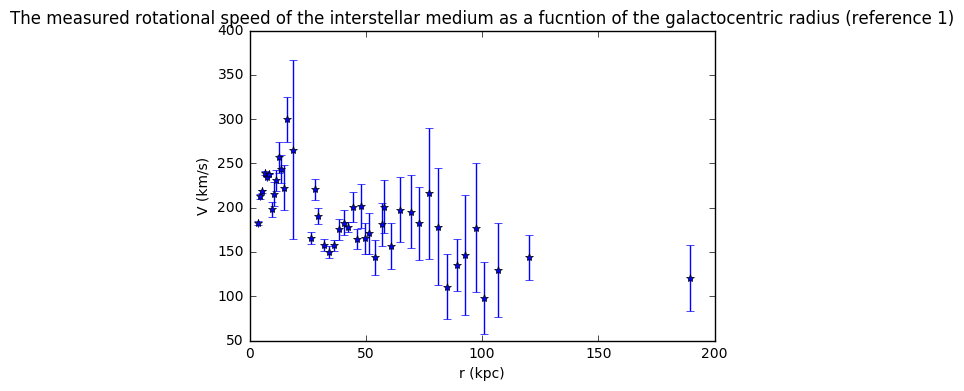

In [4]:
data_xerr = 0
plt.figure()
plt.errorbar(data_x_ref1,data_y_ref1,xerr=data_xerr,yerr=data_yerr_ref1,fmt='*')
plt.xlabel("r (kpc)")
plt.ylabel('V (km/s)')
plt.title("The measured rotational speed of the interstellar medium as a fucntion of the galactocentric radius (reference 1)")
plt.show()

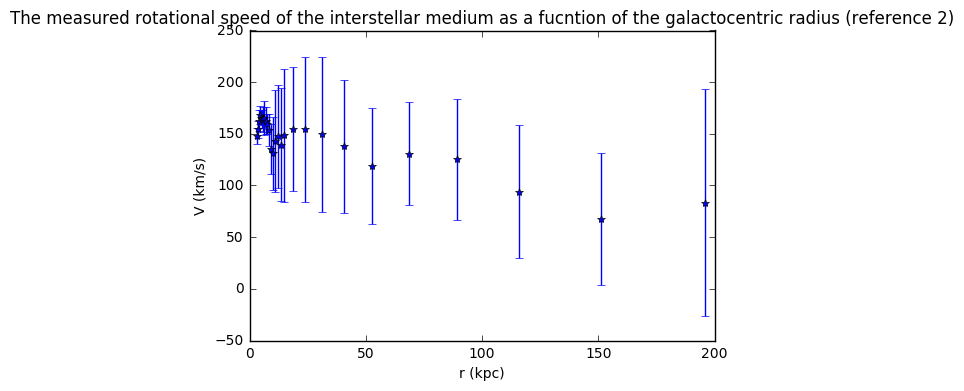

In [5]:
data_xerr = 0
plt.figure()
plt.errorbar(data_x_ref2,data_y_ref2,xerr=data_xerr,yerr=data_yerr_ref2,fmt='*')
plt.xlabel("r (kpc)")
plt.ylabel('V (km/s)')
plt.title("The measured rotational speed of the interstellar medium as a fucntion of the galactocentric radius (reference 2)")
plt.show()

### The log likelihood is meant to capture how well a model is able to reproduce the data that it is meant to simulate.

$log p(D|M, I) = constant* \prod_{i}^{} log(\sigma_i)  \sum_{i}{}(\frac{(v_{icalculated} - v_{imeasured})^2}{2 \sigma_i^2}) $

$constant* \prod_{i}^{} log(\sigma_i) $, this part doesn't matter much since they are the same for all. 

$log p(D|M, I) =  \sum_{i}{}(\frac{(v_{icalculated} - v_{imeasured})^2}{2 \sigma_i^2}) $

In [6]:
# Define the model we use to describe the data.
# The NFW model.

def model_NFW(theta, x):
    
    # Calculate the mass between 0 and data_x by integrating the NFW distribution.
    #
    # Note: the mass defined here does not include the normalization constant rho0 (kg/kpc^3).
    # The units of a are kpc.
    # The units of the "mass" calculated here are thus kpc^3.
    a = theta[0]
    mass = 4.*np.pi*(a**3)*(np.log((a+x)/a)-x/(a+x))
        
    # Calculate the rotation velocity: vrot = theta[1]*sqrt(mass/x)
    # The units of sqrt(mass/x) are kpc.
    # The rotation velocity is equal to sqrt(G*rho0)*sqrt((M/rho0)/x) where M is the mass enclosed, 
    # rho0 is the normalization constant of the mass distribution, and x is the distance at which we
    # calculate vrot.
    # When we determine theta[1], we determine sqrt(G*rho0).
    # The units of vrot are km/s.
    # The units of sqrt(mass/x) are kpc.
    # The units of theta[1] are thus (km/s)/kpc = (10^3 m)/s/(3.086E19 m) = 3.24E-17 1/s.
    # Since theta[1] = sqrt(G*rho0) we can now determine rho0: rho0 = theta[1]^2/G.
    # The units on the right-hand side are: (3.24E-17 1/s)^2/(m^3/(kg s^2)) = (3.24E-17)^2 kg/(m^3)
    # To convert from kg/m^3 to kg/kpc^3, we multiply by (3.086E19)^3
    # The normalization constant rho0 is thus (theta1[1]^2)/6.67E-11 * ((3.24E-17)^2 * (3.086E19)^3 kg/(kpc)^3 = 
    # (theta1[1]^2)*4.625E35 kg/(kpc)^3 = 2.312E5 Msun/(kpc)^3.
    vrot = theta[1]*np.sqrt(mass/x) 
    
    return vrot

In [7]:
# Define a likelihood function

def loglike_NFW_ref1(theta):
    
    # Calculate the mass between 0 and data_x by integrating the NFW distribution.
    a = theta[0]
    mass = 4.*np.pi*(a**3)*(np.log((a+data_x_ref1)/a)-data_x_ref1/(a+data_x_ref1))
        
    # Calculate the rotation velocity.
    vrot = theta[1]*np.sqrt(mass/data_x_ref1) 
        
    # The y variable is the rotational velocity.
    y = vrot
    
    # Calculate chisq
    chisq= np.sum(((data_y_ref1 - y) / data_yerr_ref1)**2)
    return -chisq / 2.



In [8]:
# Define a likelihood function
def loglike_NFW_ref2(theta):
    
    # Calculate the mass between 0 and data_x by integrating the NFW distribution.
    a = theta[0]
    mass = 4.*np.pi*(a**3)*(np.log((a+data_x_ref2)/a)-data_x_ref2/(a+data_x_ref2))
        
    # Calculate the rotation velocity.
    vrot = theta[1]*np.sqrt(mass/data_x_ref2) 
        
    # The y variable is the rotational velocity.
    y = vrot
    
    # Calculate chisq
    chisq= np.sum(((data_y_ref2 - y) / data_yerr_ref2)**2)
    return -chisq / 2.


### The prior: 
uniform priors with constraints from literature. 
  

In [9]:
# It is a transformation from a space where variables are independently and uniformly distributed between 0 and 1 to the parameter space of interest. 
# 

def prior_transform_NFW(theta):
    
    # theta[0] in the range of [0,10] and theta[1] in the range of [0,300]
    return  np.array([20, 300]) * theta


Therefore, we can calculated the posterior $ p(M|D,I) = \frac{p(M|I) p(D|M, I)}{p(D|I)} $ and compare the posterior by MCMC and/or Nestle to do model comparison. 

By using the Nestle package, it will give us log evidence, numerical (sampling) error on logz, array of sample parameters, array of weights associated with each sampleand result.weights. 

In [17]:
# Run nested sampling.

# Start with reference 1

result_ref1 = nestle.sample(loglike_NFW_ref1, prior_transform_NFW, 2)

print ('Number of iterations for Data in Reference 1')
print (result_ref1.niter)

print ('log evidence for Data in Reference 1')
print (result_ref1.logz)

print ('numerical (sampling) error on logz for Data in Reference 1')
print (result_ref1.logzerr)   
       
print ('array of sample parameters for Data in Reference 1')
print (result_ref1.samples)  
       
#print ('array of weights associated with each sample for Data in Reference 1')
#print (result_ref1.weights)

# Continue with reference 2

result_ref2 = nestle.sample(loglike_NFW_ref2, prior_transform_NFW, 2)

print ('Number of iterations for Data in Reference 2')
print (result_ref2.niter)

print ('log evidence for Data in Reference 2')
print (result_ref2.logz)

print ('numerical (sampling) error on logz for Data in Reference 2')
print (result_ref2.logzerr)   
       
print ('array of sample parameters for Data in Reference 2')
print (result_ref2.samples)  
       
#print ('array of weights associated with each sample for Data in Reference 2')
#print (result_ref2.weights)



Number of iterations for Data in Reference 1
1270
log evidence for Data in Reference 1
-292.806992476
numerical (sampling) error on logz for Data in Reference 1
0.3292482324218993
array of sample parameters for Data in Reference 1
[[  19.46445927  498.54604091]
 [  18.67516636  440.92059205]
 [  14.82833415  491.44854005]
 ..., 
 [   4.30039209   33.04273631]
 [   4.27516669   33.14986089]
 [   4.27940275   33.1458744 ]]
Number of iterations for Data in Reference 2
878
log evidence for Data in Reference 2
-10.7206316116
numerical (sampling) error on logz for Data in Reference 2
0.261963853149042
array of sample parameters for Data in Reference 2
[[  18.86053811  450.83322305]
 [  18.45486385  433.15902384]
 [  13.9440733   473.44673137]
 ..., 
 [   2.45824175   40.19479861]
 [   2.43799369   40.51141821]
 [   2.61002135   37.49864559]]


Results based on fits to the data from reference 1:
Core radius a =  4.32 +/-  0.15 kpc
Normalization factor = 32.91 +/-  1.07
Halo density normalization constant = 7.61e+06 +/- 2.47e+05 Msun/kpc^3
Halo density in our solor system = 5.40e+07 Msun/kpc^3.
Halo density in our solor system = 2.06e+03 GeV/c^2/liter.


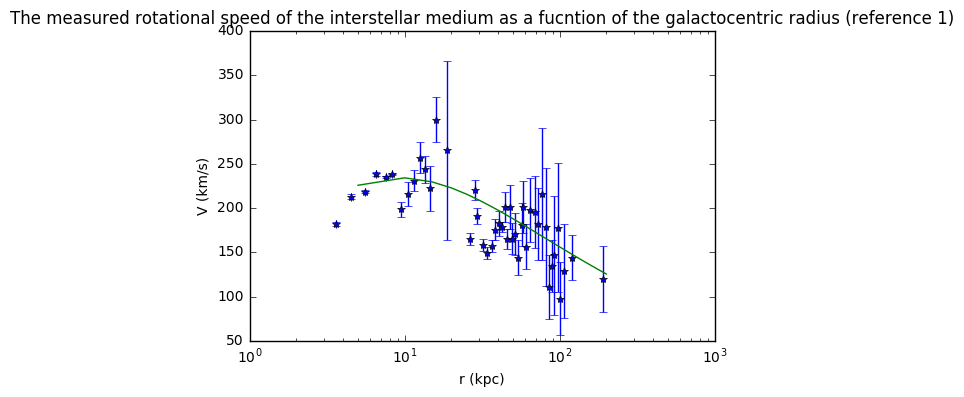

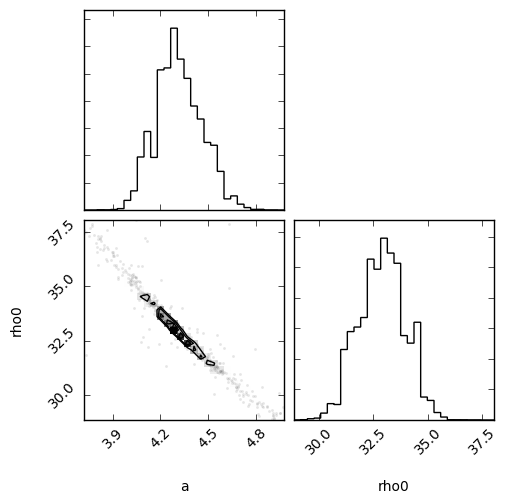

Results based on fits to the data from reference 1:
Core radius a =  2.87 +/-  0.80 kpc
Normalization factor = 37.28 +/- 10.93
Halo density normalization constant = 8.62e+06 +/- 2.53e+06 Msun/kpc^3
Halo density in our solor system = 4.05e+07 Msun/kpc^3.
Halo density in our solor system = 1.55e+03 GeV/c^2/liter.


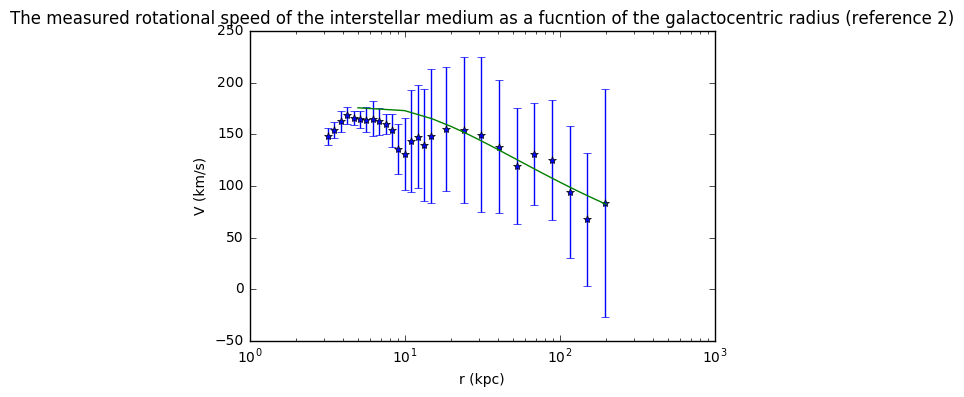

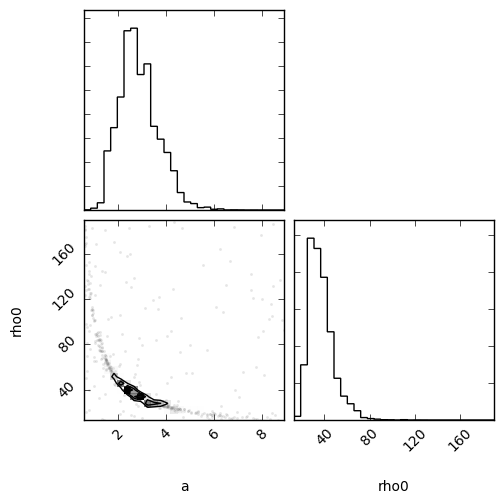

In [18]:
data_xerr = 0

# Get the results of the fit and the uncertainties in the fit parameters.
p_ref1, cov_ref1 = nestle.mean_and_cov(result_ref1.samples, result_ref1.weights)
p_ref2, cov_ref2 = nestle.mean_and_cov(result_ref2.samples, result_ref2.weights)

# Start with printing the results of the fit based on the data from reference 1
print("Results based on fits to the data from reference 1:")
print("Core radius a = {0:5.2f} +/- {1:5.2f} kpc".format(p_ref1[0], np.sqrt(cov_ref1[0, 0])))
print("Normalization factor = {0:5.2f} +/- {1:5.2f}".format(p_ref1[1], np.sqrt(cov_ref1[1, 1])))
print("Halo density normalization constant = {0:5.2e} +/- {1:5.2e} Msun/kpc^3".format(2.312E5*p_ref1[1], 2.312E5*np.sqrt(cov_ref1[1, 1])))

# Note: in order to convert the model to units of Msun/kpc^3 we multiply its value by 2.312E5.
# See comments in the model definition for details.
print("Halo density in our solor system = {0:5.2e} Msun/kpc^3.".format(2.312E5*model_NFW(p_ref1, 8)))

# Note: 1 Msun/kpc^3 = 3.817E-2 (GeV/c^2)/m^3 = 3.817E-5 (GeV/c^2)/(dm^3)
# 1 dm^3 = 1 liter.
# 3 WIMPS/liter would be 300 GeV/c^2/liter
print("Halo density in our solor system = {0:5.2e} GeV/c^2/liter.".format(3.817E-5*2.312E5*model_NFW(p_ref1, 8)))

plt.figure()
plt.errorbar(data_x_ref1,data_y_ref1,xerr=data_xerr,yerr=data_yerr_ref1,fmt='*')
plt.xlabel("r (kpc)")
plt.ylabel('V (km/s)')
plt.title("The measured rotational speed of the interstellar medium as a fucntion of the galactocentric radius (reference 1)")
xplot = [5+5*i for i in range(40)]
plt.semilogx(xplot,model_NFW(p_ref1, xplot))   # use semilogx !!!
plt.show()

fig = corner.corner(result_ref1.samples, weights=result_ref1.weights, labels=['a', 'rho0'],
                    range=[0.99999, 0.99999], bins=30)
plt.show()


# Continue with printing the results of the fit based on the data from reference 2
print("Results based on fits to the data from reference 1:")
print("Core radius a = {0:5.2f} +/- {1:5.2f} kpc".format(p_ref2[0], np.sqrt(cov_ref2[0, 0])))
print("Normalization factor = {0:5.2f} +/- {1:5.2f}".format(p_ref2[1], np.sqrt(cov_ref2[1, 1])))
print("Halo density normalization constant = {0:5.2e} +/- {1:5.2e} Msun/kpc^3".format(2.312E5*p_ref2[1], 2.312E5*np.sqrt(cov_ref2[1, 1])))

# Note: in order to convert the model to units of Msun/kpc^3 we multiply its value by 2.312E5.
# See comments in the model definition for details.
print("Halo density in our solor system = {0:5.2e} Msun/kpc^3.".format(2.312E5*model_NFW(p_ref2, 8)))

# Note: 1 Msun/kpc^3 = 3.817E-2 (GeV/c^2)/m^3 = 3.817E-5 (GeV/c^2)/(dm^3)
# 1 dm^3 = 1 liter.
# 3 WIMPS/liter would be 300 GeV/c^2/liter
print("Halo density in our solor system = {0:5.2e} GeV/c^2/liter.".format(3.817E-5*2.312E5*model_NFW(p_ref2, 8)))

plt.figure()
plt.errorbar(data_x_ref2,data_y_ref2,xerr=data_xerr,yerr=data_yerr_ref2,fmt='*')
plt.xlabel("r (kpc)")
plt.ylabel('V (km/s)')
plt.title("The measured rotational speed of the interstellar medium as a fucntion of the galactocentric radius (reference 2)")
xplot = [5+5*i for i in range(40)]
plt.semilogx(xplot,model_NFW(p_ref2, xplot))   # use semilogx !!!
plt.show()

fig = corner.corner(result_ref2.samples, weights=result_ref2.weights, labels=['a', 'rho0'],
                    range=[0.99999, 0.99999], bins=30)
plt.show()

In [10]:
# Define the model we use to describe the data.

def model_ISO(theta, x):
    
    # Calculate the mass between 0 and data_x by integrating the NFW distribution.
    #
    # Note: the mass defined here does not include the normalization constant rho0 (kg/kpc^3).
    # The units of a are kpc.
    # The units of the "mass" calculated here are thus kpc^3.
    a = theta[0]
    mass = 4.*np.pi*(a**3)*(x/a - np.arctan(x/a))
        
    # Calculate the rotation velocity: vrot = theta[1]*sqrt(mass/x)
    # The units of sqrt(mass/x) are kpc.
    # The rotation velocity is equal to sqrt(G*rho0)*sqrt((M/rho0)/x) where M is the mass enclosed, 
    # rho0 is the normalization constant of the mass distribution, and x is the distance at which we
    # calculate vrot.
    # When we determine theta[1], we determine sqrt(G*rho0).
    # The units of vrot are km/s.
    # The units of sqrt(mass/x) are kpc.
    # The units of theta[1] are thus (km/s)/kpc = (10^3 m)/s/(3.086E19 m) = 3.24E-17 1/s.
    # Since theta[1] = sqrt(G*rho0) we can now determine rho0: rho0 = theta[1]^2/G.
    # The units on the right-hand side are: (3.24E-17 1/s)^2/(m^3/(kg s^2)) = (3.24E-17)^2 kg/(m^3)
    # To convert from kg/m^3 to kg/kpc^3, we multiply by (3.086E19)^3
    # The normalization constant rho0 is thus (theta1[1]^2)/6.67E-11 * ((3.24E-17)^2 * (3.086E19)^3 kg/(kpc)^3 = 
    # (theta1[1]^2)*4.625E35 kg/(kpc)^3 = 2.312E5 Msun/(kpc)^3.
    vrot = theta[1]*np.sqrt(mass/x) 
    
    return vrot

In [11]:
# Define a likelihood function
def loglike_ISO_ref1(theta):
    
    # Calculate the mass between 0 and data_x by integrating the NFW distribution.
    a = theta[0]
    mass = 4.*np.pi*(a**3)*(data_x_ref1/a - np.arctan(data_x_ref1/a))
        
    # Calculate the rotation velocity.
    vrot = theta[1]*np.sqrt(mass/data_x_ref1) 
        
    # The y variable is the rotational velocity.
    y = vrot
    
    # Calculate chisq
    chisq= np.sum(((data_y_ref1 - y) / data_yerr_ref1)**2)
    return -chisq / 2.


In [12]:
def loglike_ISO_ref2(theta):
    
    # Calculate the mass between 0 and data_x by integrating the NFW distribution.
    a = theta[0]
    mass = 4.*np.pi*(a**3)*(data_x_ref2/a - np.arctan(data_x_ref2/a))
        
    # Calculate the rotation velocity.
    vrot = theta[1]*np.sqrt(mass/data_x_ref2) 
        
    # The y variable is the rotational velocity.
    y = vrot
    
    # Calculate chisq
    chisq= np.sum(((data_y_ref2 - y) / data_yerr_ref2)**2)
    return -chisq / 2.



In [13]:
# It is a transformation from a space where variables are independently and uniformly distributed between 0 and 1 to the parameter space of interest. 
# 

def prior_transform_ISO(theta):
    
    # theta[0] in the range of [0,10] and theta[1] in the range of [0,300]
    return  np.array([5, 1000]) * theta



In [14]:
# Define the model we use to describe the data.
# The Einasto model.

#
# Start with defining the Einasto desity function.

def rho_Einasto(x,a,n):
    
    # Calculate the Einasto density.
    # The units of a are kpc.
    # n is dimensionless
    # The units of x are kpc.
    
    # Calculate the density.
    rho = np.exp(-2.*n*(x/a)**(1./n) - 1.)

    # Return the density
    return rho


def integrand_Einasto(x,a,n):
    
    # Calculate the integrand for mass integration.
    # This is x**2 * rho
    
    # Calculate the density.
    rho = rho_Einasto(x,a,n)

    # Return the density
    return rho*x**2


def mass_Einasto(theta, x):
    
    # Calculate the mass between 0 and data_x by integrating the Einasto distribution.
    #
    # Note: the mass defined here does not include the normalization constant rho0 (kg/kpc^3).
    # The units of a are kpc.
    # n is dimensionless
    # The units of the "mass" calculated here are thus kpc^3.
    a = theta[0]
    n = theta[1]
    
    mass, err = quad(integrand_Einasto,0,x,args=(a,n))
    mass = 4.*np.pi*mass
        
    return mass


def model_Einasto(theta, x):
    
    # Calculate the mass between 0 and data_x by integrating the Einasto distribution.
    #
    # Note: the mass defined here does not include the normalization constant rho0 (kg/kpc^3).
    # The units of a are kpc.
    # n is dimensionless
    # The units of the "mass" calculated here are thus kpc^3.
    a = theta[0]
    n = theta[1]
    
    mass, err = quad(integrand_Einasto,0,x,args=(a,n))
    mass = 4.*np.pi*mass
        
    # Calculate the rotation velocity: vrot = theta[1]*sqrt(mass/x)
    # The units of sqrt(mass/x) are kpc.
    # The rotation velocity is equal to sqrt(G*rho0)*sqrt((M/rho0)/x) where M is the mass enclosed, 
    # rho0 is the normalization constant of the mass distribution, and x is the distance at which we
    # calculate vrot.
    # When we determine theta[1], we determine sqrt(G*rho0).
    # The units of vrot are km/s.
    # The units of sqrt(mass/x) are kpc.
    # The units of theta[1] are thus (km/s)/kpc = (10^3 m)/s/(3.086E19 m) = 3.24E-17 1/s.
    # Since theta[1] = sqrt(G*rho0) we can now determine rho0: rho0 = theta[1]^2/G.
    # The units on the right-hand side are: (3.24E-17 1/s)^2/(m^3/(kg s^2)) = (3.24E-17)^2 kg/(m^3)
    # To convert from kg/m^3 to kg/kpc^3, we multiply by (3.086E19)^3
    # The normalization constant rho0 is thus (theta1[1]^2)/6.67E-11 * ((3.24E-17)^2 * (3.086E19)^3 kg/(kpc)^3 = 
    # (theta1[1]^2)*4.625E35 kg/(kpc)^3 = 2.312E5 Msun/(kpc)^3.
    vrot = theta[2]*np.sqrt(mass/x) 
    
    return vrot

In [15]:
# Define a likelihood function
def loglike_Einasto_ref1(theta):
    
    # Calculate the mass between 0 and data_x by integrating the Einasto distribution.
    a = theta[0]
    n = theta[1]
    
    #mass = np.array([])
    chisq = 0.
    
    for index in range(len(data_x_ref1)):
        #np.append(mass,mass_Einasto(theta,data_x_ref1[index]))
        mass = mass_Einasto(theta,data_x_ref1[index])
        vrot = theta[2]*np.sqrt(mass/data_x_ref1[index]) 
        y = vrot
        chisq = chisq + ((data_y_ref1[index] - y) / data_yerr_ref1[index])**2
        
    # Calculate the rotation velocity.
    #vrot = theta[2]*np.sqrt(mass/data_x_ref1) 
        
    # The y variable is the rotational velocity.
    #y = vrot
    
    # Calculate chisq
    #chisq= np.sum(((data_y_ref1 - y) / data_yerr_ref1)**2)
    return -chisq / 2.



In [16]:
def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = abs(quad(integrand_Einasto, 0, 5, args=(a,b)))
I


TypeError: bad operand type for abs(): 'tuple'

In [ ]:
# It is a transformation from a space where variables are independently and uniformly distributed between 0 and 1 to the parameter space of interest. 
# 

def prior_transform_Einasto(theta):
    
    # theta[0] in the range of [0,10] and theta[1] in the range of [0,300]
    return  np.array([5, 10, 1000]) * theta




Therefore, we can calculated the posterior $ p(M|D,I) = \frac{p(M|I) p(D|M, I)}{p(D|I)} $ and compare the posterior by MCMC and/or Nestle to do model comparison. 

By using the Nestle package, it will give us log evidence, numerical (sampling) error on logz, array of sample parameters, array of weights associated with each sampleand result.weights. 

In [ ]:
# Run nested sampling.
# Start with the NFW distribution

# Start with reference 1

result_NFW_ref1 = nestle.sample(loglike_NFW_ref1, prior_transform_NFW, 2)

print ('Number of iterations')
print (result_NFW_ref1.niter)

print ('log evidence')
print (result_NFW_ref1.logz)

print ('numerical (sampling) error on logz')
print (result_NFW_ref1.logzerr)   
       
print ('array of sample parameters')
print (result_NFW_ref1.samples)  
       
print ('array of weights associated with each sample')
print (result_NFW_ref1.weights)

# Continue with reference 2

result_NFW_ref2 = nestle.sample(loglike_NFW_ref2, prior_transform_NFW, 2)

print ('Number of iterations')
print (result_NFW_ref2.niter)

print ('log evidence')
print (result_NFW_ref2.logz)

print ('numerical (sampling) error on logz')
print (result_NFW_ref2.logzerr)   
       
print ('array of sample parameters')
print (result_NFW_ref2.samples)  
       
print ('array of weights associated with each sample')
print (result_NFW_ref2.weights)


In [ ]:
# Run nested sampling.
# Start with the ISO distribution

# Start with reference 1

result_ISO_ref1 = nestle.sample(loglike_ISO_ref1, prior_transform_ISO, 2)

print ('Number of iterations')
print (result_ISO_ref1.niter)

print ('log evidence')
print (result_ISO_ref1.logz)

print ('numerical (sampling) error on logz')
print (result_ISO_ref1.logzerr)   
       
print ('array of sample parameters')
print (result_ISO_ref1.samples)  
       
print ('array of weights associated with each sample')
print (result_ISO_ref1.weights)

# Continue with reference 2

result_ISO_ref2 = nestle.sample(loglike_ISO_ref2, prior_transform_ISO, 2)

print ('Number of iterations')
print (result_ISO_ref2.niter)

print ('log evidence')
print (result_ISO_ref2.logz)

print ('numerical (sampling) error on logz')
print (result_ISO_ref2.logzerr)   
       
print ('array of sample parameters')
print (result_ISO_ref2.samples)  
       
print ('array of weights associated with each sample')
print (result_ISO_ref2.weights)



In [ ]:
data_xerr = 0

# Analyze the results of fits with the NFW model.
#
# Get the results of the fit and the uncertainties in the fit parameters.
p_NFW_ref1, cov_NFW_ref1 = nestle.mean_and_cov(result_NFW_ref1.samples, result_NFW_ref1.weights)
p_NFW_ref2, cov_NFW_ref2 = nestle.mean_and_cov(result_NFW_ref2.samples, result_NFW_ref2.weights)

# Start with printing the results of the fit based on the data from reference 1
print("Results based on fits to the data from reference 1:")
print("Core radius a = {0:5.2f} +/- {1:5.2f} kpc".format(p_NFW_ref1[0], np.sqrt(cov_NFW_ref1[0, 0])))
print("Normalization factor = {0:5.2f} +/- {1:5.2f}".format(p_NFW_ref1[1], np.sqrt(cov_NFW_ref1[1, 1])))
print("Halo density normalization constant = {0:5.2e} +/- {1:5.2e} Msun/kpc^3".format(2.312E5*p_NFW_ref1[1], 
                                                                                      2.312E5*np.sqrt(cov_NFW_ref1[1, 1])))

# Note: in order to convert the model to units of Msun/kpc^3 we multiply its value by 2.312E5.
# See comments in the model definition for details.
print("Halo density in our solor system = {0:5.2e} Msun/kpc^3.".format(2.312E5*model_NFW(p_NFW_ref1, 8)))

# Note: 1 Msun/kpc^3 = 3.817E-2 (GeV/c^2)/m^3 = 3.817E-5 (GeV/c^2)/(dm^3)
# 1 dm^3 = 1 liter.
# 3 WIMPS/liter would be 300 GeV/c^2/liter
print("Halo density in our solor system = {0:5.2e} GeV/c^2/liter.".format(3.817E-5*2.312E5*model_NFW(p_NFW_ref1, 8)))

plt.figure()
plt.errorbar(data_x_ref1,data_y_ref1,xerr=data_xerr,yerr=data_yerr_ref1,fmt='*')
plt.xlabel("r (kpc)")
plt.ylabel('V (km/s)')
plt.title("The measured rotational speed of the interstellar medium as a fucntion of the galactocentric radius (reference 1)")
xplot = [5+5*i for i in range(40)]
plt.plot(xplot,model_NFW(p_NFW_ref1, xplot))
plt.show()

fig = corner.corner(result_NFW_ref1.samples, weights=result_NFW_ref1.weights, labels=['a', 'rho0'],
                    range=[0.99999, 0.99999], bins=30)
plt.show()


# Continue with printing the results of the fit based on the data from reference 2
print("Results based on fits to the data from reference 1:")
print("Core radius a = {0:5.2f} +/- {1:5.2f} kpc".format(p_NFW_ref2[0], np.sqrt(cov_NFW_ref2[0, 0])))
print("Normalization factor = {0:5.2f} +/- {1:5.2f}".format(p_NFW_ref2[1], np.sqrt(cov_NFW_ref2[1, 1])))
print("Halo density normalization constant = {0:5.2e} +/- {1:5.2e} Msun/kpc^3".format(2.312E5*p_NFW_ref2[1], 
                                                                                      2.312E5*np.sqrt(cov_NFW_ref2[1, 1])))

# Note: in order to convert the model to units of Msun/kpc^3 we multiply its value by 2.312E5.
# See comments in the model definition for details.
print("Halo density in our solor system = {0:5.2e} Msun/kpc^3.".format(2.312E5*model_NFW(p_NFW_ref2, 8)))

# Note: 1 Msun/kpc^3 = 3.817E-2 (GeV/c^2)/m^3 = 3.817E-5 (GeV/c^2)/(dm^3)
# 1 dm^3 = 1 liter.
# 3 WIMPS/liter would be 300 GeV/c^2/liter
print("Halo density in our solor system = {0:5.2e} GeV/c^2/liter.".format(3.817E-5*2.312E5*model_NFW(p_NFW_ref2, 8)))

plt.figure()
plt.errorbar(data_x_ref2,data_y_ref2,xerr=data_xerr,yerr=data_yerr_ref2,fmt='*')
plt.xlabel("r (kpc)")
plt.ylabel('V (km/s)')
plt.title("The measured rotational speed of the interstellar medium as a fucntion of the galactocentric radius (reference 2)")
xplot = [5+5*i for i in range(40)]
plt.plot(xplot,model_NFW(p_NFW_ref2, xplot))
plt.show()

fig = corner.corner(result_NFW_ref2.samples, weights=result_NFW_ref2.weights, labels=['a', 'rho0'],
                    range=[0.99999, 0.99999], bins=30)
plt.show()

In [ ]:
data_xerr = 0

# Analyze the results of fits with the ISO model.
#
# Get the results of the fit and the uncertainties in the fit parameters.
p_ISO_ref1, cov_ISO_ref1 = nestle.mean_and_cov(result_ISO_ref1.samples, result_ISO_ref1.weights)
p_ISO_ref2, cov_ISO_ref2 = nestle.mean_and_cov(result_ISO_ref2.samples, result_ISO_ref2.weights)

# Start with printing the results of the fit based on the data from reference 1
print("Results based on fits to the data from reference 1:")
print("Core radius a = {0:5.2f} +/- {1:5.2f} kpc".format(p_ISO_ref1[0], np.sqrt(cov_ISO_ref1[0, 0])))
print("Normalization factor = {0:5.2f} +/- {1:5.2f}".format(p_ISO_ref1[1], np.sqrt(cov_ISO_ref1[1, 1])))
print("Halo density normalization constant = {0:5.2e} +/- {1:5.2e} Msun/kpc^3".format(2.312E5*p_ISO_ref1[1], 
                                                                                      2.312E5*np.sqrt(cov_ISO_ref1[1, 1])))

# Note: in order to convert the model to units of Msun/kpc^3 we multiply its value by 2.312E5.
# See comments in the model definition for details.
print("Halo density in our solor system = {0:5.2e} Msun/kpc^3.".format(2.312E5*model_ISO(p_ISO_ref1, 8)))

# Note: 1 Msun/kpc^3 = 3.817E-2 (GeV/c^2)/m^3 = 3.817E-5 (GeV/c^2)/(dm^3)
# 1 dm^3 = 1 liter.
# 3 WIMPS/liter would be 300 GeV/c^2/liter
print("Halo density in our solor system = {0:5.2e} GeV/c^2/liter.".format(3.817E-5*2.312E5*model_ISO(p_ISO_ref1, 8)))

plt.figure()
plt.errorbar(data_x_ref1,data_y_ref1,xerr=data_xerr,yerr=data_yerr_ref1,fmt='*')
plt.xlabel("r (kpc)")
plt.ylabel('V (km/s)')
plt.title("The measured rotational speed of the interstellar medium as a fucntion of the galactocentric radius (reference 1)")
xplot = [5+5*i for i in range(40)]
plt.plot(xplot,model_ISO(p_ISO_ref1, xplot))
plt.show()

fig = corner.corner(result_ISO_ref1.samples, weights=result_ISO_ref1.weights, labels=['a', 'rho0'],
                    range=[0.99999, 0.99999], bins=30)
plt.show()


# Continue with printing the results of the fit based on the data from reference 2
print("Results based on fits to the data from reference 1:")
print("Core radius a = {0:5.2f} +/- {1:5.2f} kpc".format(p_ISO_ref2[0], np.sqrt(cov_ISO_ref2[0, 0])))
print("Normalization factor = {0:5.2f} +/- {1:5.2f}".format(p_ISO_ref2[1], np.sqrt(cov_ISO_ref2[1, 1])))
print("Halo density normalization constant = {0:5.2e} +/- {1:5.2e} Msun/kpc^3".format(2.312E5*p_ISO_ref2[1], 
                                                                                      2.312E5*np.sqrt(cov_ISO_ref2[1, 1])))

# Note: in order to convert the model to units of Msun/kpc^3 we multiply its value by 2.312E5.
# See comments in the model definition for details.
print("Halo density in our solor system = {0:5.2e} Msun/kpc^3.".format(2.312E5*model_ISO(p_ISO_ref2, 8)))

# Note: 1 Msun/kpc^3 = 3.817E-2 (GeV/c^2)/m^3 = 3.817E-5 (GeV/c^2)/(dm^3)
# 1 dm^3 = 1 liter.
# 3 WIMPS/liter would be 300 GeV/c^2/liter
print("Halo density in our solor system = {0:5.2e} GeV/c^2/liter.".format(3.817E-5*2.312E5*model_ISO(p_ISO_ref2, 8)))

plt.figure()
plt.errorbar(data_x_ref2,data_y_ref2,xerr=data_xerr,yerr=data_yerr_ref2,fmt='*')
plt.xlabel("r (kpc)")
plt.ylabel('V (km/s)')
plt.title("The measured rotational speed of the interstellar medium as a fucntion of the galactocentric radius (reference 2)")
xplot = [5+5*i for i in range(40)]
plt.plot(xplot,model_ISO(p_ISO_ref2, xplot))
plt.show()

fig = corner.corner(result_ISO_ref2.samples, weights=result_ISO_ref2.weights, labels=['a', 'rho0'],
                    range=[0.99999, 0.99999], bins=30)
plt.show()

In [ ]:
# Run nested sampling.
# Start with the Einasto distribution

# Start with reference 1

result_Einasto_ref1 = nestle.sample(loglike_Einasto_ref1, prior_transform_Einasto, 3)

print ('Number of iterations')
print (result_Einasto_ref1.niter)

print ('log evidence')
print (result_Einasto_ref1.logz)

print ('numerical (sampling) error on logz')
print (result_Einasto_ref1.logzerr)   
       
print ('array of sample parameters')
print (result_Einasto_ref1.samples)  
       
print ('array of weights associated with each sample')
print (result_Einasto_ref1.weights)

# Continue with reference 2

result_Einasto_ref2 = nestle.sample(loglike_Einasto_ref2, prior_transform_Einasto, 3)

print ('Number of iterations')
print (result_Einasto_ref2.niter)

print ('log evidence')
print (result_Einasto_ref2.logz)

print ('numerical (sampling) error on logz')
print (result_Einasto_ref2.logzerr)   
       
print ('array of sample parameters')
print (result_Einasto_ref2.samples)  
       
print ('array of weights associated with each sample')
print (result_Einasto_ref2.weights)



In [ ]:

#  to complete for later calculation 

def loglike_IsothermalProfile (theta):
    #theta[1] is the constant proportional factor 
    density_IsothermalProfile =   1/( 1+data_x /theta[0] )**2 
    y=thetha[1] * 1
    chisq = np.sum(((data_y - y) / data_yerr)**2)
    return -chisq / 2.

def loglike_EinastoProfile(theta):
    #theta[2] is the constant proportional factor 
    lensity_EinastoProfile = np.exp( -  theta[0]*  data_x**theta[1] ) 
    y=theta[2] *1
    chisq = np.sum(((data_y - y) / data_yerr)**2)
    return -chisq / 2.

def loglike_GeneralizedDMProfile(theta):
    #theta[4] is the constant proportional factor 

    lensity_GeneralizedDMProfile = 1/(    (data_x /theta[0])**theta[1] *( 1+ (data_x /theta[0])**theta[2] )**2 ) **((theta[3] - theta[1])/theta[2] )
    y=theta[4] * 1
    chisq = np.sum(((data_y - y) / data_yerr)**2)
    return -chisq / 2.



